In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
x_train=x_train/255.0
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

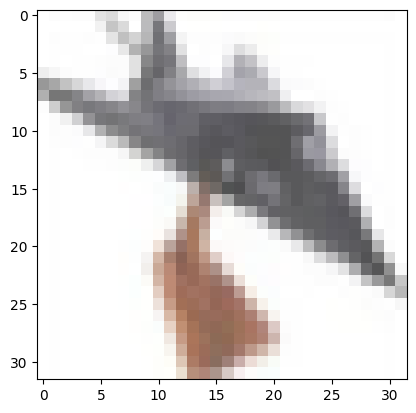

In [5]:
plt.imshow(x_test[215])

# L1, L2 test

In [6]:
batch_size = 256

In [7]:
model_cnn_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model_cnn_0.compile(loss="sparse_categorical_crossentropy", 
                    optimizer="Adam", 
                    metrics=["sparse_categorical_accuracy"])

In [9]:
history_cnn_0 = model_cnn_0.fit(x_train, y_train, epochs=10, 
                                validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.3437 - sparse_categorical_accuracy: 0.5162 - val_loss: 1.0055 - val_sparse_categorical_accuracy: 0.6502
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8886 - sparse_categorical_accuracy: 0.6871 - val_loss: 0.8274 - val_sparse_categorical_accuracy: 0.7103
Epoch 3/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.7166 - sparse_categorical_accuracy: 0.7480 - val_loss: 0.7718 - val_sparse_categorical_accuracy: 0.7345
Epoch 4/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.5940 - sparse_categorical_accuracy: 0.7921 - val_loss: 0.7567 - val_sparse_categorical_accuracy: 0.7461
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.5003 - sparse_categorical_accuracy: 0.8240 - val_loss: 0.7932 - val_sparse_categorical_accuracy: 0.7371
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.

In [10]:
model_cnn_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l1(0.02)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l1(0.02)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l1(0.02)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.02)),
    tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l1(0.02))
])

In [11]:
model_cnn_1.compile(loss="sparse_categorical_crossentropy", 
                    optimizer="Adam", 
                    metrics=["sparse_categorical_accuracy"])

In [12]:
history_cnn_1 = model_cnn_1.fit(x_train, y_train, 
                                                            epochs=10,
                                                              validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 54s 35ms/step - loss: 6.6460 - sparse_categorical_accuracy: 0.0994 - val_loss: 3.7639 - val_sparse_categorical_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 3.7683 - sparse_categorical_accuracy: 0.0975 - val_loss: 3.7826 - val_sparse_categorical_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 3.7682 - sparse_categorical_accuracy: 0.1005 - val_loss: 3.7409 - val_sparse_categorical_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 53s 34ms/step - loss: 3.7681 - sparse_categorical_accuracy: 0.0989 - val_loss: 3.7806 - val_sparse_categorical_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 3.7680 - sparse_categorical_accuracy: 0.0975 - val_loss: 3.7847 - val_sparse_categorical_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 54s 34ms/step - loss: 3.

In [13]:
model_cnn_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01))
])

In [14]:
model_cnn_2.compile(loss="sparse_categorical_crossentropy", 
                    optimizer="Adam", 
                    metrics=["sparse_categorical_accuracy"])

In [15]:
history_cnn_2 = model_cnn_2.fit(x_train, y_train, 
                                                                epochs=10,
                                                                 validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 53s 34ms/step - loss: 2.0252 - sparse_categorical_accuracy: 0.3214 - val_loss: 1.8162 - val_sparse_categorical_accuracy: 0.3933
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.7566 - sparse_categorical_accuracy: 0.4174 - val_loss: 1.6866 - val_sparse_categorical_accuracy: 0.4450
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.6760 - sparse_categorical_accuracy: 0.4582 - val_loss: 1.6312 - val_sparse_categorical_accuracy: 0.4721
Epoch 4/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.6401 - sparse_categorical_accuracy: 0.4746 - val_loss: 1.6136 - val_sparse_categorical_accuracy: 0.4798
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.6075 - sparse_categorical_accuracy: 0.4902 - val_loss: 1.5893 - val_sparse_categorical_accuracy: 0.5015
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.

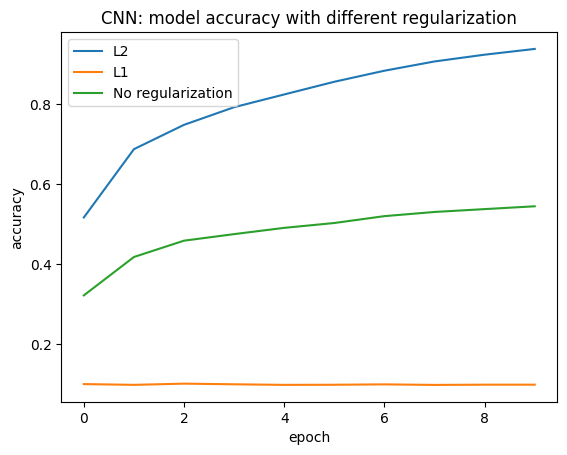

In [16]:
import matplotlib.pyplot as plt
plt.plot(history_cnn_0.history['sparse_categorical_accuracy'])
plt.plot(history_cnn_1.history['sparse_categorical_accuracy'])
plt.plot(history_cnn_2.history['sparse_categorical_accuracy'])
plt.title('CNN: model accuracy with different regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['L2', 'L1', 'No regularization'], loc='upper left')
plt.show()

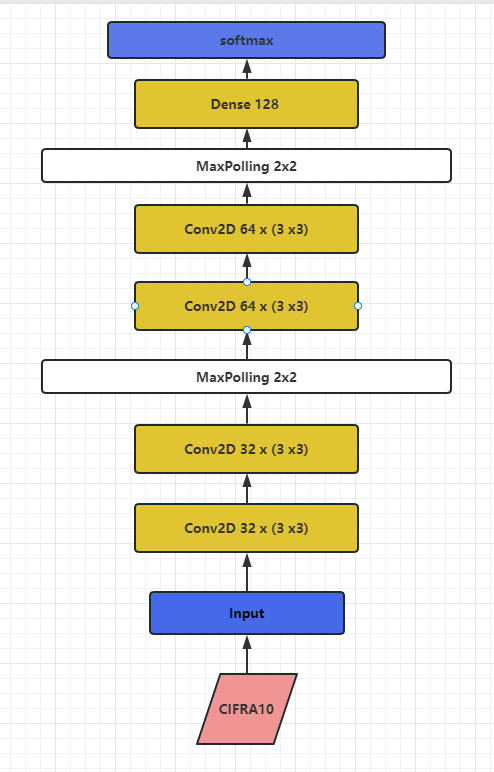

# Dropout test

In [27]:
model_cnn_2_drop = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Dropout(0.3,noise_shape=None,seed=None),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Dropout(0.3,noise_shape=None,seed=None),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Dropout(0.3,noise_shape=None,seed=None),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Dropout(0.3,noise_shape=None,seed=None),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3,noise_shape=None,seed=None),
    tf.keras.layers.Dense(units=128,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01))
])

In [28]:
model_cnn_2_drop.compile(loss="sparse_categorical_crossentropy", 
                    optimizer="Adam", 
                    metrics=["sparse_categorical_accuracy"])

In [29]:
history_cnn_2_drop = model_cnn_2_drop.fit(x_train, y_train, epochs=20, validation_data=(x_test,y_test))

Epoch 1/20
1563/1563 [==============================] - 85s 55ms/step - loss: 2.4151 - sparse_categorical_accuracy: 0.1007 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000
Epoch 2/20
1563/1563 [==============================] - 87s 56ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0994 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.1000
Epoch 3/20
1563/1563 [==============================] - 87s 56ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0973 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000
Epoch 4/20
1563/1563 [==============================] - 87s 56ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0978 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000
Epoch 5/20
1563/1563 [==============================] - 86s 55ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0981 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000
Epoch 6/20
1563/1563 [==============================] - 87s 56ms/step - loss: 2.

In [30]:
model_cnn_2_nodrop = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01))
])

In [31]:
model_cnn_2_nodrop.compile(loss="sparse_categorical_crossentropy", 
                    optimizer="Adam", 
                    metrics=["sparse_categorical_accuracy"])

In [32]:
history_cnn_2_nodrop = model_cnn_2_nodrop.fit(x_train, y_train, epochs=20,   validation_data=(x_test,y_test))

Epoch 1/20
1563/1563 [==============================] - 83s 53ms/step - loss: 2.4129 - sparse_categorical_accuracy: 0.0979 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000
Epoch 2/20
1563/1563 [==============================] - 82s 53ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0971 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000
Epoch 3/20
1563/1563 [==============================] - 83s 53ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0988 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000
Epoch 4/20
1563/1563 [==============================] - 83s 53ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0953 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000
Epoch 5/20
1563/1563 [==============================] - 82s 53ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0983 - val_loss: 2.3027 - val_sparse_categorical_accuracy: 0.1000
Epoch 6/20
1563/1563 [==============================] - 83s 53ms/step - loss: 2.

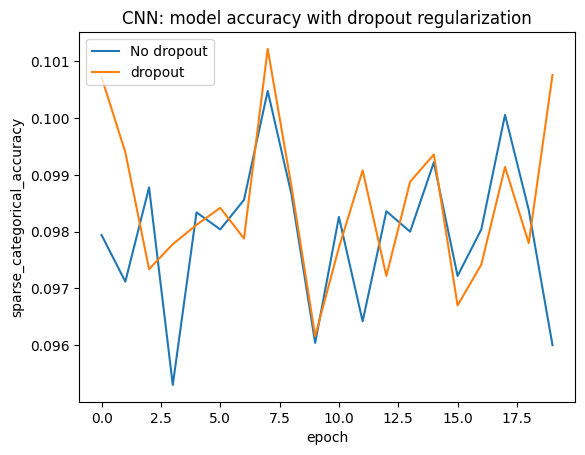

In [33]:
import matplotlib.pyplot as plt
plt.plot(history_cnn_2_nodrop.history['sparse_categorical_accuracy'])
plt.plot(history_cnn_2_drop.history['sparse_categorical_accuracy'])
plt.title('CNN: model accuracy with dropout regularization')
plt.ylabel('sparse_categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['No dropout', 'dropout'], loc='upper left')
plt.show()

In [34]:
print(history_cnn_2_nodrop.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


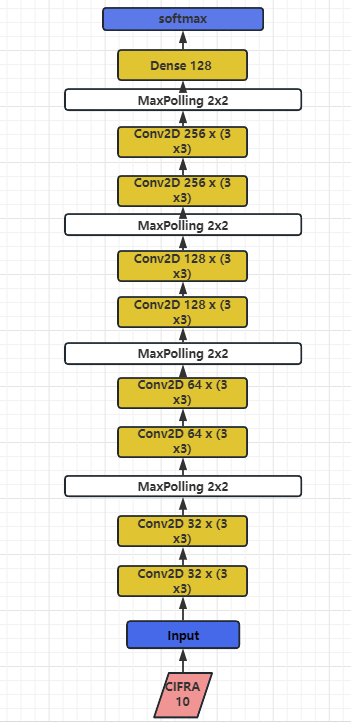